## Plotting ISCO sample inventory over winter 2023 discharge

### Discharge data from Satish in sonya-may2024 directory

## TO DO:

- [ ] error bars on EM NO3 barplot
- [ ] use this nb to calc EM variance

Rows: 137 Columns: 31
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (10): Sample ID, Site, Date, Type, Type2, Index-notes, ICP-notes, IC-no...
dbl  (20): Fe_mg_L, Mn_mg_L, Cu_mg_L, Zn_mg_L, Si_mg_L, K_mg_L, P_mg_L, Mg_m...
time  (1): Time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


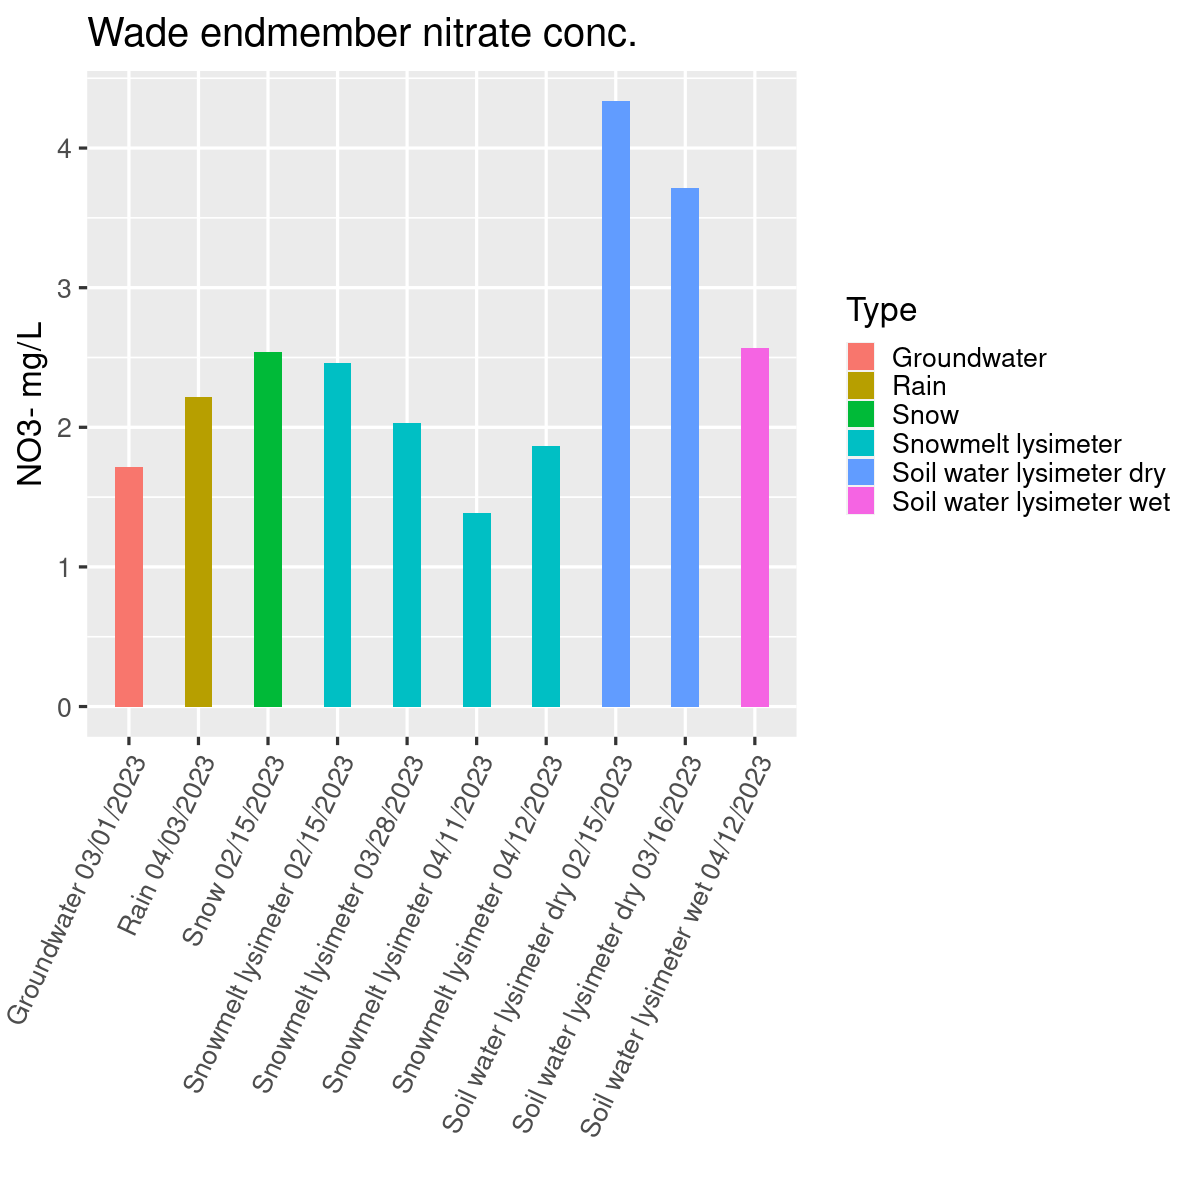

In [37]:
#################
# LOAD PACKAGES #
#################

library(tidyverse)
library(viridis)
library(dplyr)
library(lubridate)
library(caTools)  # for numerical integration
library(data.table) # for nearest join of q and ISCO data
library(patchwork)
library(ggplot2)

###################
# SET DIRECTORIES #
###################

q_input_dir <- "~//OneDrive/git-repos/cQ_analysis/millar2021_R_separation_hysteresis/sonya-may24/data"
c_input_dir <- "~//OneDrive/git-repos/EMMA/isco_metadata/LCBP_RI_sample_index/"
m_input_dir <- "~//OneDrive/git-repos/cQ_analysis/baseflow-rules-determinaton/data/"
output_dir <- "~//OneDrive/git-repos/EMMA/output/"

##########################
# READ IN AND CLEAN DATA #
##########################

# read in the RI23 data
# see joining here: 
# https://github.com/MeganEDuffy/EMMA/blob/main/isco_metadata/LCBP_RI_sample_index/RI23-sample-ID-join.ipynb
# I have a manual version that prunes out replicate endmember measurements - should use for error bars eventually
MetadataISCO <- read_csv(file.path(c_input_dir, "RI23-IC-ICP-isotope-joined_dups_pruned.csv")) %>%
    filter(Type2 == 'Endmember') %>%
    filter(Site == "Wade") %>%
    drop_na("NO3_mg_L") %>%
    mutate(Fullname = paste(Type, Date, sep = " "))

# Convert the "Date" column to date format and Time to time format
MetadataISCO$Date <- mdy(MetadataISCO$Date)  # mdy() parses dates in "month/day/year" format 

# Combine Date, Time, and Time zone columns into a single Datetime column
MetadataISCO <- MetadataISCO %>%
  mutate(Datetime = ymd_hms(paste(Date, format(Time, "%H:%M:%S"), "Time Zone")))

###################
# PLOT NO3 values #
###################

options(repr.plot.width = 10, repr.plot.height = 10) 

ggplot(MetadataISCO, aes(x=Fullname, y=NO3_mg_L, fill = Type)) +
   geom_bar(stat = "identity", width=0.4)+
   xlab("") +
   ylab("NO3- mg/L") +
   ggtitle("Wade endmember nitrate conc.") +
   theme_grey(base_size = 20) +
   theme(axis.text.x = element_text(angle = 65, hjust = 1))
   

Rows: 137 Columns: 31
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (10): Sample ID, Site, Date, Type, Type2, Index-notes, ICP-notes, IC-no...
dbl  (20): Fe_mg_L, Mn_mg_L, Cu_mg_L, Zn_mg_L, Si_mg_L, K_mg_L, P_mg_L, Mg_m...
time  (1): Time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


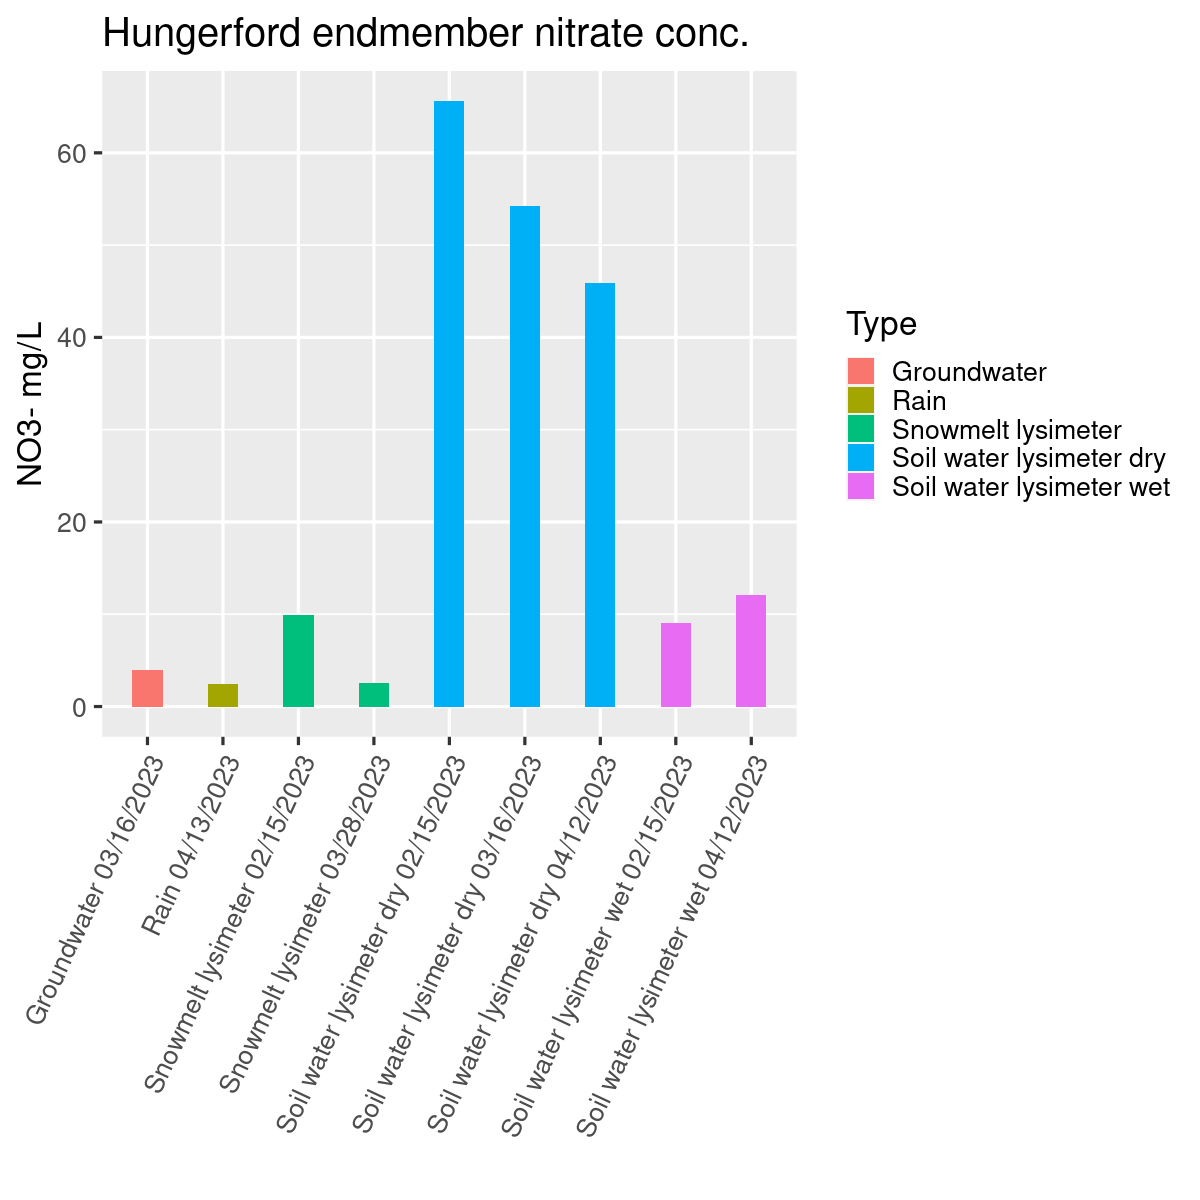

In [40]:
#################
# LOAD PACKAGES #
#################

library(tidyverse)
library(viridis)
library(dplyr)
library(lubridate)
library(caTools)  # for numerical integration
library(data.table) # for nearest join of q and ISCO data
library(patchwork)
library(ggplot2)

###################
# SET DIRECTORIES #
###################

q_input_dir <- "~//OneDrive/git-repos/cQ_analysis/millar2021_R_separation_hysteresis/sonya-may24/data"
c_input_dir <- "~//OneDrive/git-repos/EMMA/isco_metadata/LCBP_RI_sample_index/"
m_input_dir <- "~//OneDrive/git-repos/cQ_analysis/baseflow-rules-determinaton/data/"
output_dir <- "~//OneDrive/git-repos/EMMA/output/"

##########################
# READ IN AND CLEAN DATA #
##########################

# read in the RI23 data
# see joining here: 
# https://github.com/MeganEDuffy/EMMA/blob/main/isco_metadata/LCBP_RI_sample_index/RI23-sample-ID-join.ipynb
MetadataISCO <- read_csv(file.path(c_input_dir, "RI23-IC-ICP-isotope-joined.csv")) %>%
    filter(Type2 == 'Endmember') %>%
    filter(Site == "Hungerford") %>%
    drop_na("NO3_mg_L") %>%
    mutate(Fullname = paste(Type, Date, sep = " "))

# Convert the "Date" column to date format and Time to time format
MetadataISCO$Date <- mdy(MetadataISCO$Date)  # mdy() parses dates in "month/day/year" format 

# Combine Date, Time, and Time zone columns into a single Datetime column
MetadataISCO <- MetadataISCO %>%
  mutate(Datetime = ymd_hms(paste(Date, format(Time, "%H:%M:%S"), "Time Zone")))

###################
# PLOT NO3 values #
###################

ggplot(MetadataISCO, aes(x=Fullname, y=NO3_mg_L, fill = Type)) +
   geom_bar(stat = "identity", width=0.4)+
   xlab("") +
   ylab("NO3- mg/L") +
   ggtitle("Hungerford endmember nitrate conc.") +
   theme_grey(base_size = 20) +
   theme(axis.text.x = element_text(angle = 65, hjust = 1))
   

In [17]:
MetadataISCO

Sample ID,Site,Date,Time,Type,Type2,Index-notes,ICP-notes,Fe_mg_L,Mn_mg_L,⋯,NO3_mg_L,PO4_mg_L,SO4_mg_L,IC-notes,NRS_LWIA_notes,dD,d18O,iso-notes,Fullname,Datetime
<chr>,<chr>,<date>,<time>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dttm>
RI23-1063,Wade,2023-03-28,12:00:00,Snowmelt lysimeter,Endmember,NA,NA,NA,NA,⋯,2.030000,NA,1.320900,time is arbitrary,NA,-95.260,-14.233,NA,Type Date,2023-03-28 12:00:00
RI23-1098,Wade,2023-04-11,12:00:00,Snowmelt lysimeter,Endmember,NA,NA,-0.008248453,0.002126952,⋯,1.387500,2.200400,1.001200,NA,NA,-89.353,-12.731,NA,Type Date,2023-04-11 12:00:00
RI23-5000,Wade,2023-02-15,12:00:00,Soil water lysimeter,Endmember,dry site,WD_lysmtr_021523,0.091445162,0.005409173,⋯,4.338447,1.589904,2.869525,2024-10-03 MED switched SO4 and PO4 values because I think they are erroneous. Verified in Chromeleon I don't think SS knew the swap the peaks.,NA,-93.641,-13.233,NA,Type Date,2023-02-15 12:00:00
RI23-5004,Wade,2023-02-15,12:00:00,Snow,Endmember,NA,WD_snow_021523,-0.023113687,-0.015549119,⋯,2.542800,NA,3.448100,2024-10-03 MED switched SO4 and PO4 values because I think they are erroneous. Verified in Chromeleon I don't think SS knew the swap the peaks.,NA,NA,NA,NA,Type Date,2023-02-15 12:00:00
RI23-5005,Wade,2023-02-15,12:00:00,Snowmelt lysimeter,Endmember,NA,WD_snow_lysmtr_021523,-0.007382155,0.002961813,⋯,2.458984,1.597084,3.543680,2024-10-03 MED switched SO4 and PO4 values because I think they are erroneous. Verified in Chromeleon I don't think SS knew the swap the peaks.,NA,-109.383,-15.682,Dry lys,Type Date,2023-02-15 12:00:00
RI23-5005,Wade,2023-02-15,12:00:00,Snowmelt lysimeter,Endmember,NA,WD_snow_lysmtr_021523,-0.007382155,0.002961813,⋯,2.458984,1.597084,3.543680,2024-10-03 MED switched SO4 and PO4 values because I think they are erroneous. Verified in Chromeleon I don't think SS knew the swap the peaks.,NA,-85.767,-12.292,Dry Site,Type Date,2023-02-15 12:00:00
RI23-5006,Wade,2023-03-01,12:00:00,Groundwater,Endmember,well,High_Pond_031023 is it march 1st or 10th,-0.008999159,-0.003347686,⋯,1.717066,NA,10.921701,2024-10-03 MED switched SO4 and PO4 values because I think they are erroneous. Verified in Chromeleon I don't think SS knew the swap the peaks.,NA,-76.119,-11.570,Grab - MED is it gw though?,Type Date,2023-03-01 12:00:00
RI23-5009,Wade,2023-03-16,12:00:00,Soil water lysimeter,Endmember,wet or dry unrecorded,WD_lysmtr_031623,0.100960430,0.005224850,⋯,3.712501,1.597330,4.732060,2024-10-03 MED switched SO4 and PO4 values because I think they are erroneous. Verified in Chromeleon I don't think SS knew the swap the peaks.,NA,-89.934,-13.330,Dry lys,Type Date,2023-03-16 12:00:00
RI23-5010,Wade,2023-04-03,12:00:00,Precip,Endmember,NA,WD_precip_040323,-0.022544739,-0.014485150,⋯,2.216317,NA,3.514949,2024-10-03 MED switched SO4 and PO4 values because I think they are erroneous. Verified in Chromeleon I don't think SS knew the swap the peaks.,NA,-87.824,-13.232,NA,Type Date,2023-04-03 12:00:00


In [ ]:
# Convert the "Date" column to date format and Time to time format
MetadataISCO$Date <- mdy(MetadataISCO$Date)  # mdy() parses dates in "month/day/year" format 

# Combine Date, Time, and Time zone columns into a single Datetime column
MetadataISCO <- MetadataISCO %>%
  mutate(Datetime = ymd_hms(paste(Date, format(Time, "%H:%M:%S"), "Time Zone")))

# Read in the q data
Hungerford_q <- read_csv(file.path(q_input_dir, "hb_q_chem.csv")) %>%
  mutate(q_cms = q_cms_hb)
Wade_q <- read_csv(file.path(q_input_dir, "wb_q_chem.csv")) %>%
  mutate(q_cms = q_cms_wb)

# Read in the met data for air temp
Hungerford_m <- read_csv(file.path(m_input_dir, "hungerford_2020-2024_met_2024-11-08.csv")) %>%
  filter(Timestamp > as.Date("2023-01-01 00:00:00"), 
        Timestamp < as.Date("2023-04-20 00:00:00")) %>%
  mutate(Stream = "Hungerford")
  
Wade_m <- read_csv(file.path(m_input_dir, "wade_2020-2024_met_2024-11-08.csv")) %>%
  filter(Timestamp > as.Date("2023-01-01 00:00:00"), 
        Timestamp < as.Date("2023-04-20 00:00:00")) %>%
  mutate(Stream = "Wade")

# Remove rows with NA for Air_Temp for Wade and Precip
Wade_m_clean <- Wade_m %>% filter(!is.na(Air_Temp))
Wade_m_clean <- Wade_m %>% filter(!is.na(Precip_Increm))

#######################
# PLOT ENDMEMBER RANGES
#######################

In [ ]:
MetadataISCO